<a href="https://colab.research.google.com/github/RegaipKURT/Machine-Learning-Python/blob/master/qualitics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qualitics of Products - BUTS (Bozüyük Üretim Takip Sistemi)

##Dateset Description
The datased used in this project mostly consists from sensor measurements from production line. Other than sensor measurements this dataset also include values about the products and dates and times of processes. 


##Goal
The purpose of the project is to find which part or phase of the production causes defective products. Is it possible to determine or even modelling, which product party will have more defective outcomes from sensor values? If it is how can we reduce the number defective products?

This project is aimed to find answers to questions above. Since the modelling or predictions has no affect on the outcomes we will focus on analysis part much more. Predictive models will be used to find the part of inputs which causes defective products.


##Expected Value Framework
The expected benefit of the project is to find causes of the defective products and hence by designing the production line again to reduce the number of defective products. So our benefit, can be financially described as the difference between the cost of defective products before the project and after the project. So this difference of the costs must be higher than the project cost in order to be defined profitable. 

The lack of contact between persons who made this project and who made financial decisions from the inside of company makes it impossible to decide how higher benefit should be than the cost. 

But still we can describe the expected benefit formula of the project. Total number of products multipllied by its cost after analytics minus  total number of products multipllied by its cost before analytics. During the project these cost terms may change so they sould be defined concretely in the formula. 

After the expected benefit we need expected cost of the project and this cost could be specified with financial unit of the company. Since we don't have connection to financial unit we will be define expected cost as a function.

Our result can be assesed by subtracting eepected value from expected cost. Our formula is as defined as below: 

**$${EV} = {EB} - {EL}$$**

**EV** represents Expected Value and Expected Value equals to difference between Expected Benefit minus Expected Loss

$$
EV =\frac{ {n_{1}} + {n_{2}} }{2} \mathcal{\left(\frac{\sum\limits _{i}^{n_{1}} c_{b}}{n_{1}} \ - \frac{\sum\limits _{i}^{n_{2}} c_{a}}{n_{2}}\right) \ -\ f( c)}
$$

EV represents the expected value and ${f( c)}$ is the cost function of the project. $n$ is the total number of products and $c_{a}$ and $c_{b}$ are the cost of the defective product respectively after the project and before the project.

So according to this formula the gap between the total cost of the defective product before the project and after the project must be higher than the cost of the project in order to be profitable.

---
**Note:** *The diffrerence of the costs should be normalize. Because the number 
of products influences the costs between after and before the project.* So we multiplied normalized cost difference with $\frac{ {n_{1}} + {n_{2}} }{2} $.

---

## Crisp-DM
<img width="800" src='https://www.datascience-pm.com/wp-content/uploads/2021/02/CRISP-DM.png' />



## 1.   Business Understanding

Business information has been given by the company's data science team to group. We defined an expected value framework above with respect to these informations.

## 2.   Data Understanding
First we got information from business department and then we tried to grasp deeply the dataset by using visualization techniques. 

## 3.   Data Preparation

We have missing values and outliers to handle in our dataset. We used difference methods to deal with missing values and outliers. We will explain our methods on the presentation. 

After handle the outliers and missing values we will be try to enhance our dataset by using feature engineering. 

## 4.   Analysis and Modelling
We used statistical tests and different models to optimize the problem. 

## 5.   Evaluation
Statistical test will be examined by its own methods. Since we have a classification problem we will use models which is convenient to this problem. According to business department, it is hard to get well-fitted models to this dataset.

## 6.   Deployment
Since we have no intention to use this analysis in real world application we don't have to deploy our models and analysis.


### After business and data understanding we have a project cycle between the third and fifth section constantly. We keep going by improving our results.


In [ ]:
!pip install autofeat
import autofeat

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")
import pandas as pd
#import drive to save files
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/MyDrive/Patika/qualitics.csv")
print(df.shape)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(8491, 59)


# Target Value

On Kalite column 10, 11 shows disqualified items, and 2,1 show qualified ones.

In [ ]:
iskarta = np.where((df["Kalite"] == 10) | (df["Kalite"] == 11.0), 1, 0)
df["ISKARTA"] = iskarta
print("Missing Value Count: ", df.ISKARTA.isna().sum()) # total missing values

Missing Value Count:  0


# DATETIME VALUES AND  FEATURE EXTRACTION FOR DATETIMES

Convert datetime values to datetime datatype

In [ ]:
df.columns

Index(['Surec1_Onay_Tarihi', 'K2', 'K2_TARIH', 'K4', 'Surec2_Tarihi',
       'Kalite_Kontrol_Tarihi', 'MAKINE', 'Kalite', 'Surec1_Bitis_Tarihi',
       'Surec1_Baslama_Tarihi', 'PART_NO', 'fazK_dk', 'FazS_dk', 'FazD_dk',
       'FazB_dk', 'FazS_Basinci_Mean', 'FazS_Basinci_Stdev',
       'FazB_Basinci_Max', 'FazK_Basinci_Last', 'FazD_Basinci_Last',
       'K17_K16_Mesafe', 'K16', 'K18', 'K17', 'K19', 'K20', 'K21', 'K22',
       'K23', 'K24', 'K23_K24_Mesafe', 'K25', 'K26', 'K26_K25_Mesafe', 'K27',
       'K28', 'K29', 'K30', 'K31', 'K32', 'K33', 'K34', 'K35', 'K36', 'K37',
       'K38', 'K39', 'K40', 'K41', 'K42', 'K43', 'K44', 'K45', 'K46',
       'Surec4_Baslangic', 'Surec4_Bitis', 'Surec4_K1', 'Surec4_K2',
       'Surec4_K3', 'ISKARTA'],
      dtype='object')

In [ ]:
dates = ["Surec1_Onay_Tarihi", "Surec2_Tarihi", "Kalite_Kontrol_Tarihi", "Surec1_Bitis_Tarihi", "Surec1_Baslama_Tarihi", "Surec4_Baslangic", "Surec4_Bitis"]
for i in dates:
    df[i] = pd.to_datetime(df[i])

## Feature extraction from datetimes

In [ ]:
#Select differents shifts from start and end dates of phases.
df["Vardiya_1"] = np.where((df.Surec1_Bitis_Tarihi.dt.hour >= 0) & (df.Surec1_Bitis_Tarihi.dt.hour <= 7), 1, 0)
df["Vardiya_2"] = np.where((df.Surec1_Bitis_Tarihi.dt.hour >= 8) & (df.Surec1_Bitis_Tarihi.dt.hour <= 15), 1, 0)
df["Vardiya_3"] = np.where((df.Surec1_Bitis_Tarihi.dt.hour >= 16) & (df.Surec1_Bitis_Tarihi.dt.hour <= 23), 1, 0)

#convert shifts to categorical.
df.Vardiya_1 = df.Vardiya_1.astype("category")
df.Vardiya_2 = df.Vardiya_2.astype("category")
df.Vardiya_3 = df.Vardiya_3.astype("category")

# get phase differences as seconds
df["SUREC_1_2_FARK_SAAT"] = (df.Surec2_Tarihi- df.Surec1_Baslama_Tarihi)
df["SUREC_1_4_FARK_SAAT"] = (df.Surec4_Baslangic- df.Surec1_Baslama_Tarihi) 
df["SUREC_2_4_FARK_SAAT"] = (df.Surec4_Baslangic- df.Surec2_Tarihi) 

#convert seconds to hours
df.SUREC_1_2_FARK_SAAT=df.SUREC_1_2_FARK_SAAT.dt.seconds / 3600
df.SUREC_1_4_FARK_SAAT=df.SUREC_1_4_FARK_SAAT.dt.seconds / 3600
df.SUREC_2_4_FARK_SAAT=df.SUREC_2_4_FARK_SAAT.dt.seconds / 3600

In [ ]:
#get shifts for different phases.
df["VARDIYA_SAAT_SUREC_1"] = df.Surec1_Bitis_Tarihi.dt.hour
df["VARDIYA_SAAT_SUREC_2"] = df.Surec2_Tarihi.dt.hour
df["VARDIYA_SAAT_SUREC_4"] = df.Surec4_Bitis.dt.hour

In [ ]:
df["SUREC1_FARK"] = (df.Surec1_Bitis_Tarihi - df.Surec1_Baslama_Tarihi).dt.seconds
def add_datepart(df,dt_name,drop=True):
    new_df = df.copy()
    dt_column = new_df[dt_name]
    column_dtype = dt_column.dtype
    
    attr = ['month','day','dayofweek','dayofyear'] # feature names
    
    for a in attr:
        new_df[dt_name + "Date"+ a.capitalize()]= getattr(dt_column.dt,a)
    new_df[dt_name + "Date"+'Elapsed']=dt_column.astype("category")
    
    if drop:
        new_df.drop(dt_name,axis=1, inplace=True)

    return new_df

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8491 entries, 0 to 8490
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype                                
---  ------                 --------------  -----                                
 0   Surec1_Onay_Tarihi     8491 non-null   datetime64[ns, pytz.FixedOffset(180)]
 1   K2                     1 non-null      float64                              
 2   K2_TARIH               1 non-null      object                               
 3   K4                     1 non-null      float64                              
 4   Surec2_Tarihi          7573 non-null   datetime64[ns, pytz.FixedOffset(180)]
 5   Kalite_Kontrol_Tarihi  8491 non-null   datetime64[ns, pytz.FixedOffset(180)]
 6   MAKINE                 8491 non-null   object                               
 7   Kalite                 8491 non-null   int64                                
 8   Surec1_Bitis_Tarihi    8491 non-null   datetime64[ns, pytz.FixedOffs

In [ ]:
for datez in 'Surec1_Onay_Tarihi Surec2_Tarihi Kalite_Kontrol_Tarihi Surec1_Bitis_Tarihi Surec1_Baslama_Tarihi Surec4_Bitis Surec4_Baslangic'.split():
  df = add_datepart(df, datez, drop=True)

In [ ]:
df.columns

Index(['K2', 'K2_TARIH', 'K4', 'MAKINE', 'Kalite', 'PART_NO', 'fazK_dk',
       'FazS_dk', 'FazD_dk', 'FazB_dk', 'FazS_Basinci_Mean',
       'FazS_Basinci_Stdev', 'FazB_Basinci_Max', 'FazK_Basinci_Last',
       'FazD_Basinci_Last', 'K17_K16_Mesafe', 'K16', 'K18', 'K17', 'K19',
       'K20', 'K21', 'K22', 'K23', 'K24', 'K23_K24_Mesafe', 'K25', 'K26',
       'K26_K25_Mesafe', 'K27', 'K28', 'K29', 'K30', 'K31', 'K32', 'K33',
       'K34', 'K35', 'K36', 'K37', 'K38', 'K39', 'K40', 'K41', 'K42', 'K43',
       'K44', 'K45', 'K46', 'Surec4_K1', 'Surec4_K2', 'Surec4_K3', 'ISKARTA',
       'Vardiya_1', 'Vardiya_2', 'Vardiya_3', 'SUREC_1_2_FARK_SAAT',
       'SUREC_1_4_FARK_SAAT', 'SUREC_2_4_FARK_SAAT', 'VARDIYA_SAAT_SUREC_1',
       'VARDIYA_SAAT_SUREC_2', 'VARDIYA_SAAT_SUREC_4', 'SUREC1_FARK',
       'Surec1_Onay_TarihiDateMonth', 'Surec1_Onay_TarihiDateDay',
       'Surec1_Onay_TarihiDateDayofweek', 'Surec1_Onay_TarihiDateDayofyear',
       'Surec1_Onay_TarihiDateElapsed', 'Surec2_TarihiDateM

# Drop unused columns


In [ ]:
df.drop('Kalite PART_NO'.split(), axis = 1, inplace = True)

# Convert some columns to categorical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8491 entries, 0 to 8490
Data columns (total 96 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   K2                                  1 non-null      float64 
 1   K2_TARIH                            1 non-null      object  
 2   K4                                  1 non-null      float64 
 3   MAKINE                              8491 non-null   object  
 4   fazK_dk                             8482 non-null   float64 
 5   FazS_dk                             8480 non-null   float64 
 6   FazD_dk                             8484 non-null   float64 
 7   FazB_dk                             8484 non-null   float64 
 8   FazS_Basinci_Mean                   8471 non-null   float64 
 9   FazS_Basinci_Stdev                  8471 non-null   float64 
 10  FazB_Basinci_Max                    8484 non-null   float64 
 11  FazK_Basinci_Last             

In [ ]:
df.MAKINE = df.MAKINE.astype("category")
df.ISKARTA = df.ISKARTA.astype("category")

In [ ]:
df.head()

,K2,K2_TARIH,K4,MAKINE,fazK_dk,FazS_dk,FazD_dk,FazB_dk,FazS_Basinci_Mean,FazS_Basinci_Stdev,FazB_Basinci_Max,FazK_Basinci_Last,FazD_Basinci_Last,K17_K16_Mesafe,K16,K18,K17,K19,K20,K21,K22,K23,K24,K23_K24_Mesafe,K25,K26,K26_K25_Mesafe,K27,K28,K29,K30,K31,K32,K33,K34,K35,K36,K37,K38,K39,...,SUREC_2_4_FARK_SAAT,VARDIYA_SAAT_SUREC_1,VARDIYA_SAAT_SUREC_2,VARDIYA_SAAT_SUREC_4,SUREC1_FARK,Surec1_Onay_TarihiDateMonth,Surec1_Onay_TarihiDateDay,Surec1_Onay_TarihiDateDayofweek,Surec1_Onay_TarihiDateDayofyear,Surec1_Onay_TarihiDateElapsed,Surec2_TarihiDateMonth,Surec2_TarihiDateDay,Surec2_TarihiDateDayofweek,Surec2_TarihiDateDayofyear,Surec2_TarihiDateElapsed,Kalite_Kontrol_TarihiDateMonth,Kalite_Kontrol_TarihiDateDay,Kalite_Kontrol_TarihiDateDayofweek,Kalite_Kontrol_TarihiDateDayofyear,Kalite_Kontrol_TarihiDateElapsed,Surec1_Bitis_TarihiDateMonth,Surec1_Bitis_TarihiDateDay,Surec1_Bitis_TarihiDateDayofweek,Surec1_Bitis_TarihiDateDayofyear,Surec1_Bitis_TarihiDateElapsed,Surec1_Baslama_TarihiDateMonth,Surec1_Baslama_TarihiDateDay,Surec1_Baslama_TarihiDateDayofweek,Surec1_Baslama_TarihiDateDayofyear,Surec1_Baslama_TarihiDateElapsed,Surec4_BitisDateMonth,Surec4_BitisDateDay,Surec4_BitisDateDayofweek,Surec4_BitisDateDayofyear,Surec4_BitisDateElapsed,Surec4_BaslangicDateMonth,Surec4_BaslangicDateDay,Surec4_BaslangicDateDayofweek,Surec4_BaslangicDateDayofyear,Surec4_BaslangicDateElapsed
0,NaN,NaN,NaN,X,8.116515,14.297782,0.733718,2.512547,13.734,1.445375,7.2576,5.6,0.0,NaN,NaN,NaN,NaN,NaN,2531.2,40.6,945.0,427.0,267.4,159.6,99.4,197.4,69.51,12.18,32.494,NaN,NaN,NaN,NaN,74.2,322.0,266.0,249.2,0.238,0.322,3.346,...,3.566667,3,18.0,13.0,1659,5,1,5,121,2021-05-01 03:27:00+03:00,5.0,2.0,6.0,122.0,2021-05-02 18:12:00+03:00,5,5,2,125,2021-05-05 17:20:00+03:00,5,1,5,121,2021-05-01 03:19:58.110000+03:00,5,1,5,121,2021-05-01 02:52:18.761000+03:00,5.0,4.0,1.0,124.0,2021-05-04 13:46:00+03:00,5.0,3.0,0.0,123.0,2021-05-03 21:46:00+03:00
1,NaN,NaN,NaN,X,8.116515,14.297782,0.733718,2.512547,13.734,1.445375,7.2576,5.6,0.0,NaN,NaN,NaN,NaN,NaN,2531.2,40.6,945.0,427.0,267.4,159.6,99.4,197.4,69.51,12.18,32.494,NaN,NaN,NaN,NaN,74.2,322.0,266.0,249.2,0.238,0.322,3.346,...,3.558333,3,18.0,13.0,1659,5,1,5,121,2021-05-01 03:27:00+03:00,5.0,2.0,6.0,122.0,2021-05-02 18:14:00+03:00,5,5,2,125,2021-05-05 17:21:00+03:00,5,1,5,121,2021-05-01 03:19:58.110000+03:00,5,1,5,121,2021-05-01 02:52:18.761000+03:00,5.0,4.0,1.0,124.0,2021-05-04 13:47:30+03:00,5.0,3.0,0.0,123.0,2021-05-03 21:47:30+03:00
2,NaN,NaN,NaN,X,8.116515,14.297782,0.733718,2.512547,13.734,1.445375,7.2576,5.6,0.0,NaN,NaN,NaN,NaN,NaN,2531.2,40.6,945.0,427.0,267.4,159.6,99.4,197.4,69.51,12.18,32.494,NaN,NaN,NaN,NaN,74.2,322.0,266.0,249.2,0.238,0.322,3.346,...,14.816667,3,18.0,0.0,1659,5,1,5,121,2021-05-01 03:58:00+03:00,5.0,2.0,6.0,122.0,2021-05-02 18:10:00+03:00,5,4,1,124,2021-05-04 15:48:00+03:00,5,1,5,121,2021-05-01 03:19:58.110000+03:00,5,1,5,121,2021-05-01 02:52:18.761000+03:00,5.0,4.0,1.0,124.0,2021-05-04 00:59:00+03:00,5.0,3.0,0.0,123.0,2021-05-03 08:59:00+03:00
3,NaN,NaN,NaN,X,8.116515,14.297782,0.733718,2.512547,13.734,1.445375,7.2576,5.6,0.0,NaN,NaN,NaN,NaN,NaN,2531.2,40.6,945.0,427.0,267.4,159.6,99.4,197.4,69.51,12.18,32.494,NaN,NaN,NaN,NaN,74.2,322.0,266.0,249.2,0.238,0.322,3.346,...,14.783333,3,18.0,0.0,1659,5,1,5,121,2021-05-01 03:58:00+03:00,5.0,2.0,6.0,122.0,2021-05-02 18:11:00+03:00,5,4,1,124,2021-05-04 15:45:00+03:00,5,1,5,121,2021-05-01 03:19:58.110000+03:00,5,1,5,121,2021-05-01 02:52:18.761000+03:00,5.0,4.0,1.0,124.0,2021-05-04 00:58:00+03:00,5.0,3.0,0.0,123.0,2021-05-03 08:58:00+03:00
4,NaN,NaN,NaN,Y,8.116515,14.297782,0.733718,2.512547,13.734,1.445375,7.2576,5.6,0.0,NaN,NaN,NaN,NaN,NaN,2531.2,40.6,945.0,427.0,267.4,159.6,99.4,197.4,69.51,12.18,32.494,2413.6,119.0,78.4,33.6,72.8,320.6,259.0,249.2,0.266,0.308,3.402,...,3.075000,3,16.0,11.0,1659,5,1,5,121,2021-05-01 03:59:00+03:00,5.0,3.0,0.0,123.0,2021-05-03 16:53:00+03:00,5,4,1,124,2021-05-04 15:02:00+03:00,5,1,5,121,2021-05-01 03:19:58.110000+03:0

# Missing Values

First we have to know if missing values occur random or not. Some missing values could occur together. So this relationship will be tagged a value between 0 and 1 on the graph below.

In [ ]:
#remove columns have missing value rate above 95 percent.
def removeMissingValues(df, directRemoveRate=0.95, axis=1):
    dropped = {}
    for i in df.columns:
        missRate = df[i].isna().sum() / df.shape[0]
        if missRate > directRemoveRate:
            df.drop(labels=[i], axis=axis, inplace=True)
            dropped[i] = missRate
            continue
    print("Removed Columns and Rates:\n", dropped)

removeMissingValues(df)

Removed Columns and Rates:
 {'K2': 0.9998822282416676, 'K2_TARIH': 0.9998822282416676, 'K4': 0.9998822282416676}


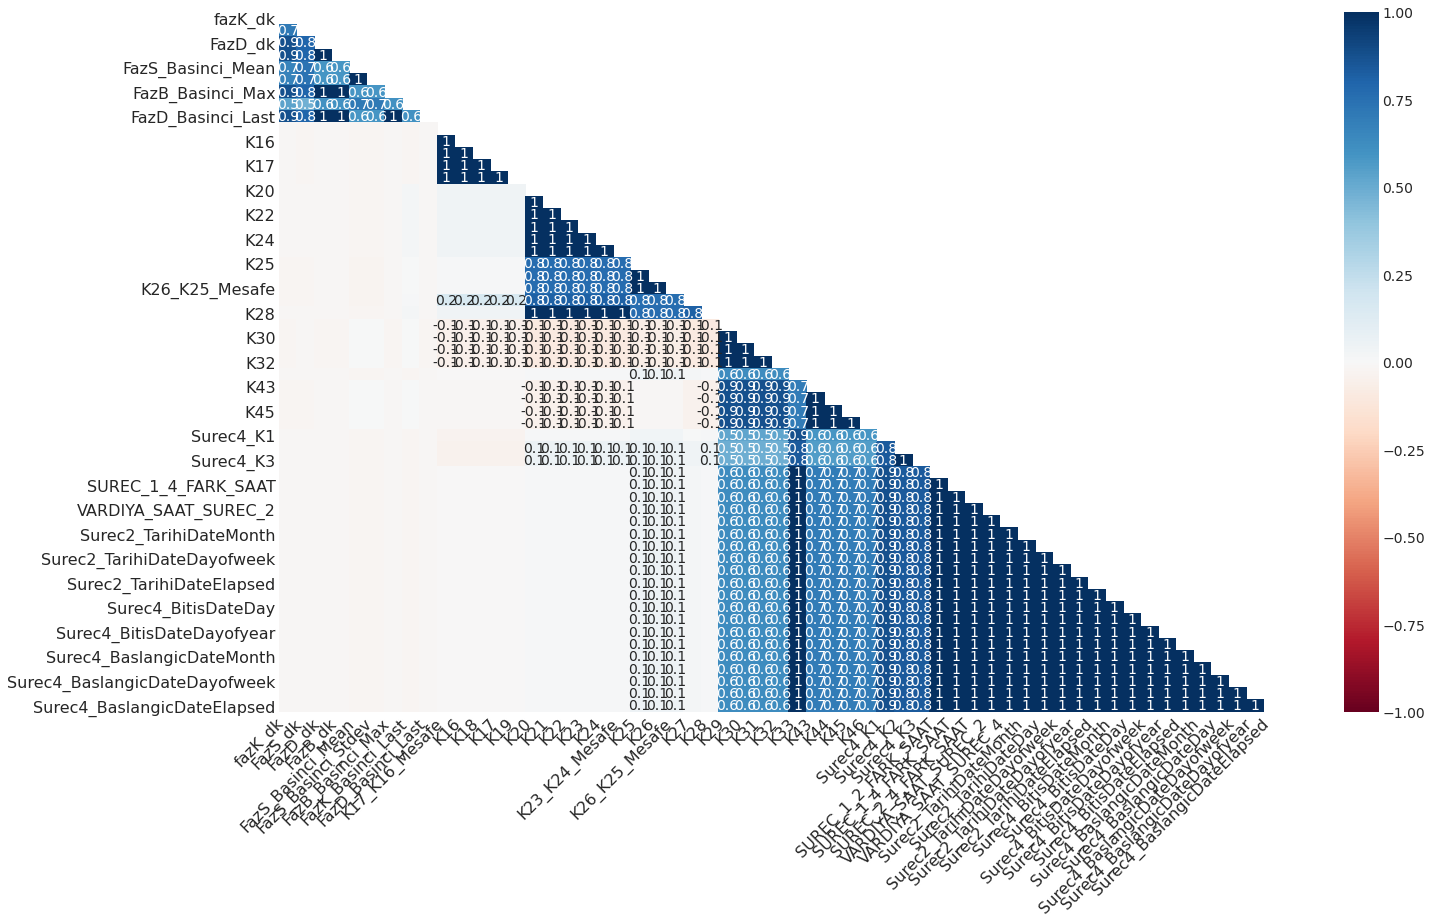

In [ ]:
msno.heatmap(df)

In [ ]:
df.isna().sum()

MAKINE                                   0
fazK_dk                                  9
FazS_dk                                 11
FazD_dk                                  7
FazB_dk                                  7
FazS_Basinci_Mean                       20
FazS_Basinci_Stdev                      20
FazB_Basinci_Max                         7
FazK_Basinci_Last                       19
FazD_Basinci_Last                        7
K17_K16_Mesafe                        1507
K16                                   1507
K18                                   1507
K17                                   1507
K19                                   1507
K20                                   1186
K21                                   1186
K22                                   1186
K23                                   1186
K24                                   1186
K23_K24_Mesafe                        1186
K25                                   1831
K26                                   1831
K26_K25_Mes

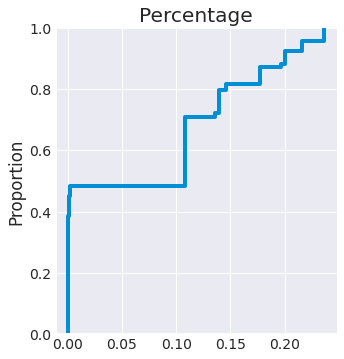

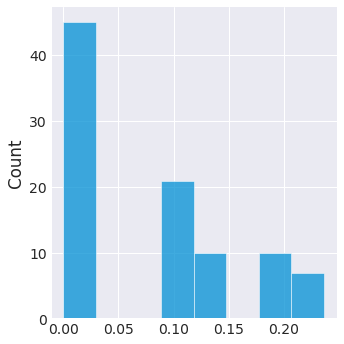

In [ ]:
missingRatesDf = (df.isna().sum() / df.shape[0])
sns.displot(missingRatesDf, kind="ecdf")
plt.title("Percentage")
sns.displot(missingRatesDf, kind="hist")

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

for i in df.columns:
    if type(df[i].dtype) == np.dtype:
        df[i] = imputer.fit_transform(np.array(df[i]).reshape(-1,1))

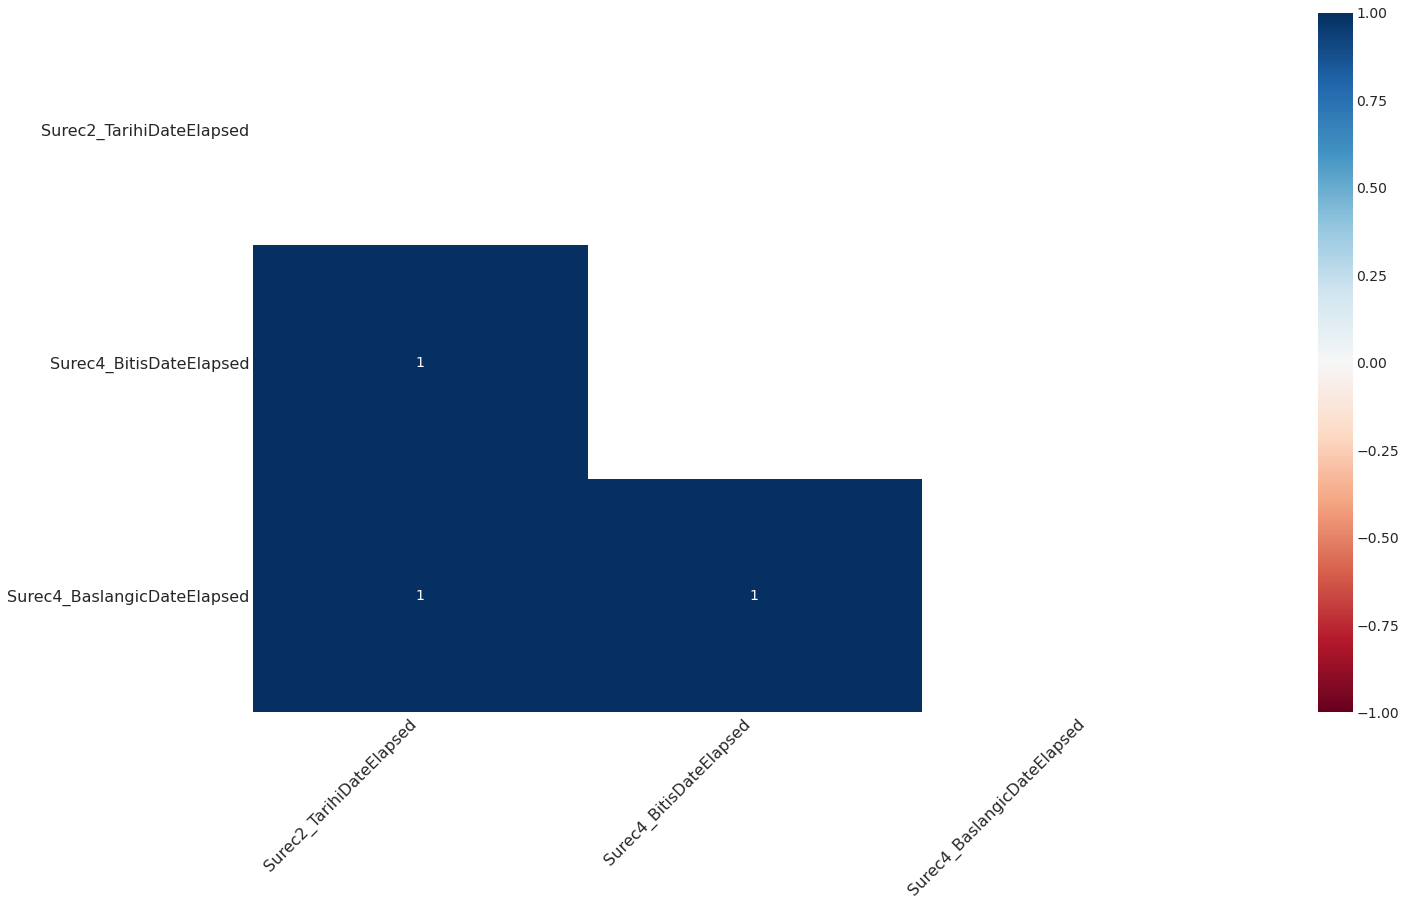

In [ ]:
msno.heatmap(df)

In [ ]:
pd.options.display.max_rows = None

In [ ]:
df.isna().sum()

MAKINE                                  0
fazK_dk                                 0
FazS_dk                                 0
FazD_dk                                 0
FazB_dk                                 0
FazS_Basinci_Mean                       0
FazS_Basinci_Stdev                      0
FazB_Basinci_Max                        0
FazK_Basinci_Last                       0
FazD_Basinci_Last                       0
K17_K16_Mesafe                          0
K16                                     0
K18                                     0
K17                                     0
K19                                     0
K20                                     0
K21                                     0
K22                                     0
K23                                     0
K24                                     0
K23_K24_Mesafe                          0
K25                                     0
K26                                     0
K26_K25_Mesafe                    

In [ ]:
cols = 'Surec4_BaslangicDateElapsed Surec2_TarihiDateElapsed Surec4_BitisDateElapsed'.split()
df.drop(cols, axis=1, inplace=True)



# Outlier Handling

We tried all methods for outliers. There is no difference for models. But to protect the scale of data we used the method below. Method involves modifying the outlier values to the boundaries of the distribution.

In [ ]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0] 
            df[col][df[col] >= percentiles[1]] = percentiles[1] 
        else:
            df[col]=df[col]
    return df

cleaned_df=cap_data(df)

capping the  MAKINE
capping the  fazK_dk


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  FazS_dk
capping the  FazD_dk


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

capping the  FazB_dk
capping the  FazS_Basinci_Mean
capping the  FazS_Basinci_Stdev


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

capping the  FazB_Basinci_Max
capping the  FazK_Basinci_Last


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


capping the  FazD_Basinci_Last
capping the  K17_K16_Mesafe


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  K16
capping the  K18


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

capping the  K17
capping the  K19


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


capping the  K20
capping the  K21


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  K22


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


capping the  K23
capping the  K24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  K23_K24_Mesafe
capping the  K25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

capping the  K26
capping the  K26_K25_Mesafe


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


capping the  K27
capping the  K28


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  K29
capping the  K30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

capping the  K31
capping the  K32


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


capping the  K33
capping the  K34


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  K35
capping the  K36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

capping the  K37
capping the  K38
capping the  K39


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

capping the  K40
capping the  K41


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


capping the  K42
capping the  K43


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  K44
capping the  K45


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

capping the  K46
capping the  Surec4_K1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


capping the  Surec4_K2
capping the  Surec4_K3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  ISKARTA
capping the  Vardiya_1
capping the  Vardiya_2
capping the  Vardiya_3
capping the  SUREC_1_2_FARK_SAAT


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  SUREC_1_4_FARK_SAAT
capping the  SUREC_2_4_FARK_SAAT


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

capping the  VARDIYA_SAAT_SUREC_1
capping the  VARDIYA_SAAT_SUREC_2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  VARDIYA_SAAT_SUREC_4
capping the  SUREC1_FARK


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

capping the  Surec1_Onay_TarihiDateMonth
capping the  Surec1_Onay_TarihiDateDay


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


capping the  Surec1_Onay_TarihiDateDayofweek


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  Surec1_Onay_TarihiDateDayofyear
capping the  Surec1_Onay_TarihiDateElapsed
capping the  Surec2_TarihiDateMonth


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


capping the  Surec2_TarihiDateDay
capping the  Surec2_TarihiDateDayofweek


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  Surec2_TarihiDateDayofyear
capping the  Kalite_Kontrol_TarihiDateMonth


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

capping the  Kalite_Kontrol_TarihiDateDay
capping the  Kalite_Kontrol_TarihiDateDayofweek


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


capping the  Kalite_Kontrol_TarihiDateDayofyear
capping the  Kalite_Kontrol_TarihiDateElapsed
capping the  Surec1_Bitis_TarihiDateMonth


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  Surec1_Bitis_TarihiDateDay
capping the  Surec1_Bitis_TarihiDateDayofweek


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

capping the  Surec1_Bitis_TarihiDateDayofyear
capping the  Surec1_Bitis_TarihiDateElapsed
capping the  Surec1_Baslama_TarihiDateMonth


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


capping the  Surec1_Baslama_TarihiDateDay
capping the  Surec1_Baslama_TarihiDateDayofweek


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  Surec1_Baslama_TarihiDateDayofyear
capping the  Surec1_Baslama_TarihiDateElapsed
capping the  Surec4_BitisDateMonth


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value

capping the  Surec4_BitisDateDay
capping the  Surec4_BitisDateDayofweek


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


capping the  Surec4_BitisDateDayofyear


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


capping the  Surec4_BaslangicDateMonth
capping the  Surec4_BaslangicDateDay


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


capping the  Surec4_BaslangicDateDayofweek
capping the  Surec4_BaslangicDateDayofyear


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8491 entries, 0 to 8490
Data columns (total 90 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   MAKINE                              8491 non-null   category
 1   fazK_dk                             8491 non-null   float64 
 2   FazS_dk                             8491 non-null   float64 
 3   FazD_dk                             8491 non-null   float64 
 4   FazB_dk                             8491 non-null   float64 
 5   FazS_Basinci_Mean                   8491 non-null   float64 
 6   FazS_Basinci_Stdev                  8491 non-null   float64 
 7   FazB_Basinci_Max                    8491 non-null   float64 
 8   FazK_Basinci_Last                   8491 non-null   float64 
 9   FazD_Basinci_Last                   8491 non-null   float64 
 10  K17_K16_Mesafe                      8491 non-null   float64 
 11  K16                           

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
oh = OneHotEncoder(drop="first")
cleaned_df.MAKINE = le.fit_transform(cleaned_df.MAKINE)
cleaned_df.ISKARTA = le.fit_transform(cleaned_df.ISKARTA)


0.7062978222483814


array([[1136,  319],
       [ 180,   64]])

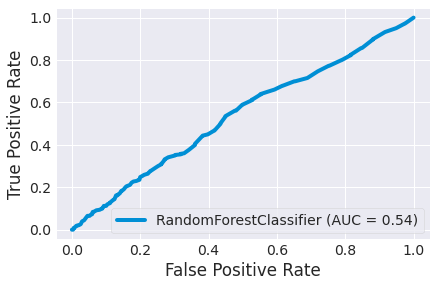

In [ ]:
y = cleaned_df["ISKARTA"]
x = cleaned_df.drop(labels=["ISKARTA"], axis=1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True)

model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
print(accuracy_score(y_pred, y_test))
plot_roc_curve(model, X_test, y_test)
confusion_matrix(y_pred, y_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1316
           1       0.26      0.17      0.20       383

    accuracy                           0.71      1699
   macro avg       0.52      0.52      0.51      1699
weighted avg       0.66      0.71      0.68      1699



              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1316
           1       0.00      0.00      0.00       383

    accuracy                           0.77      1699
   macro avg       0.39      0.50      0.44      1699
weighted avg       0.60      0.77      0.68      1699

[[1316    0]
 [ 383    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


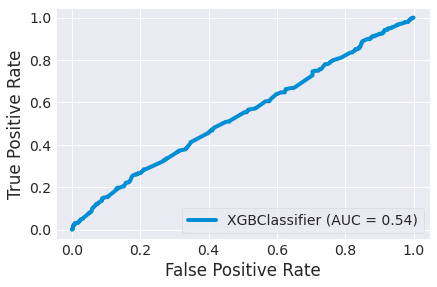

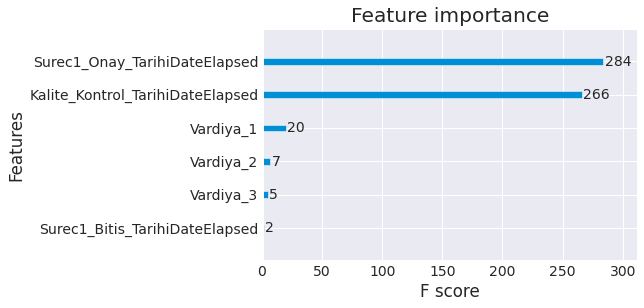

In [ ]:
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import StandardScaler

colz = 'Vardiya_1 Vardiya_2 Vardiya_3 Surec1_Onay_TarihiDateElapsed Kalite_Kontrol_TarihiDateElapsed Surec1_Bitis_TarihiDateElapsed Surec1_Baslama_TarihiDateElapsed'.split()
X_train2 = X_train[colz].astype('float64')
X_test2  = X_test[colz].astype('float64')


model_xgb = XGBClassifier()
model_xgb.fit(X_train2, y_train)
preds = model_xgb.predict(X_test2)
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))
plot_roc_curve(model_xgb, X_test2, y_test)

plot_importance(model_xgb)

In [ ]:
cleaned_df.ISKARTA.value_counts()

0    6586
1    1905
Name: ISKARTA, dtype: int64

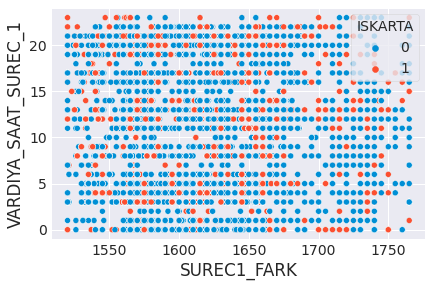

In [ ]:
sns.scatterplot(x="SUREC1_FARK", y="VARDIYA_SAAT_SUREC_1", data=cleaned_df, hue="ISKARTA")

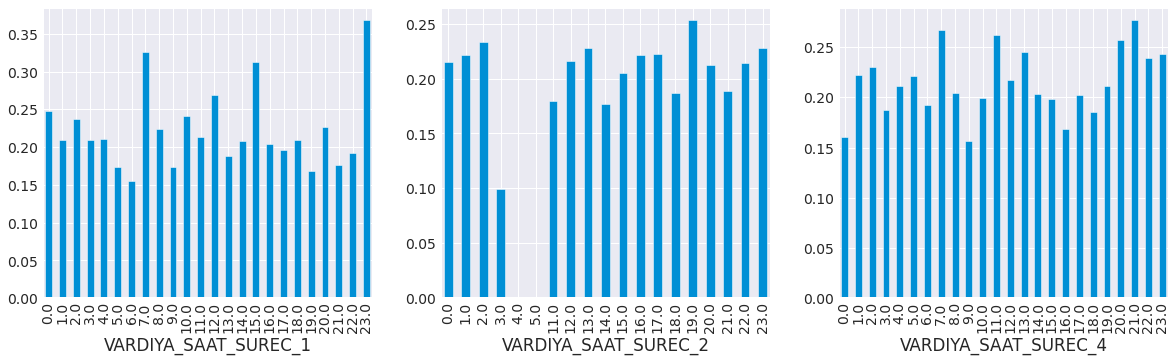

In [ ]:
plt.figure(figsize = (18, 5))
plt.subplot(1, 3, 1)
cleaned_df.groupby("VARDIYA_SAAT_SUREC_1").mean()["FazD_Basinci_Last"].plot(kind="bar")

plt.subplot(1, 3, 2)
cleaned_df.groupby("VARDIYA_SAAT_SUREC_2").mean()["FazD_Basinci_Last"].plot(kind="bar")

plt.subplot(1, 3, 3)
cleaned_df.groupby("VARDIYA_SAAT_SUREC_4").mean()["FazD_Basinci_Last"].plot(kind="bar")

FazD_Basinci_Last  ISKARTA
-0.20748           0           101
                   1            25
 0.00000           0          3442
                   1           989
 0.20748           0           262
                   1            70
 0.41496           0          1858
                   1           529
 0.62202           0           923
                   1           292
Name: ISKARTA, dtype: int64


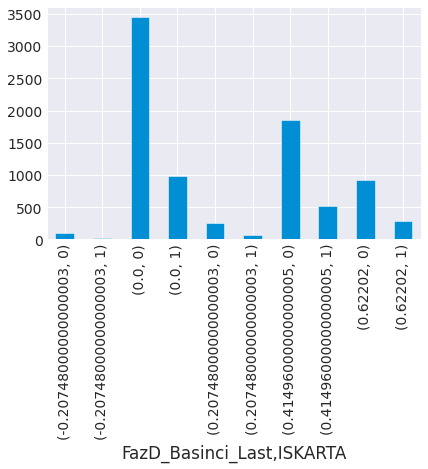

In [ ]:
print(cleaned_df.groupby("FazD_Basinci_Last")["ISKARTA"].value_counts())
cleaned_df.groupby("FazD_Basinci_Last")["ISKARTA"].value_counts().plot(kind="bar")
# 007, 0.25, 0.27, 0.26, 0.28, 0.30

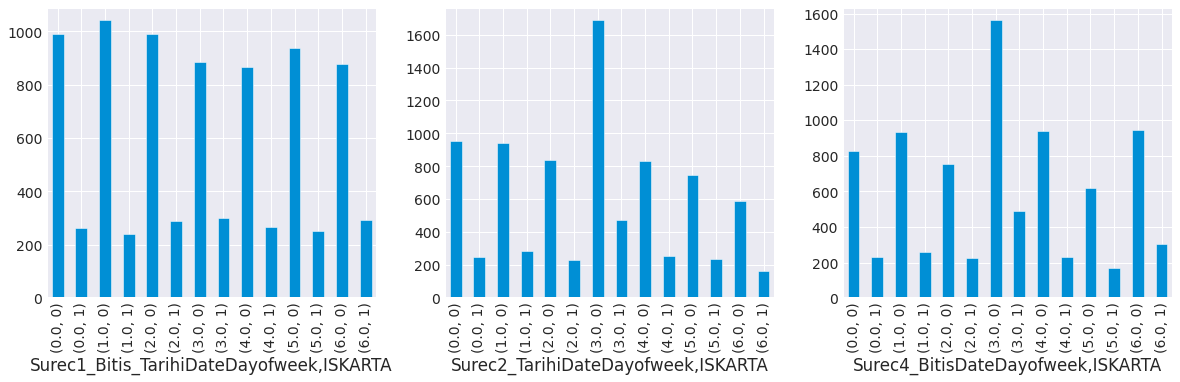

In [ ]:
plt.figure(figsize = (18, 5))
plt.subplot(1, 3, 1)
cleaned_df.groupby("Surec1_Bitis_TarihiDateDayofweek")["ISKARTA"].value_counts().plot(kind="bar")

plt.subplot(1, 3, 2)
cleaned_df.groupby("Surec2_TarihiDateDayofweek")["ISKARTA"].value_counts().plot(kind="bar")

plt.subplot(1, 3, 3)
cleaned_df.groupby("Surec4_BitisDateDayofweek")["ISKARTA"].value_counts().plot(kind="bar")

In [ ]:
cleaned_df.groupby("MAKINE").sum()

,fazK_dk,FazS_dk,FazD_dk,FazB_dk,FazS_Basinci_Mean,FazS_Basinci_Stdev,FazB_Basinci_Max,FazK_Basinci_Last,FazD_Basinci_Last,K17_K16_Mesafe,K16,K18,K17,K19,K20,K21,K22,K23,K24,K23_K24_Mesafe,K25,K26,K26_K25_Mesafe,K27,K28,K29,K30,K31,K32,K33,K34,K35,K36,K37,K38,K39,K40,K41,K42,K43,...,K46,Surec4_K1,Surec4_K2,Surec4_K3,ISKARTA,SUREC_1_2_FARK_SAAT,SUREC_1_4_FARK_SAAT,SUREC_2_4_FARK_SAAT,VARDIYA_SAAT_SUREC_1,VARDIYA_SAAT_SUREC_2,VARDIYA_SAAT_SUREC_4,SUREC1_FARK,Surec1_Onay_TarihiDateMonth,Surec1_Onay_TarihiDateDay,Surec1_Onay_TarihiDateDayofweek,Surec1_Onay_TarihiDateDayofyear,Surec2_TarihiDateMonth,Surec2_TarihiDateDay,Surec2_TarihiDateDayofweek,Surec2_TarihiDateDayofyear,Kalite_Kontrol_TarihiDateMonth,Kalite_Kontrol_TarihiDateDay,Kalite_Kontrol_TarihiDateDayofweek,Kalite_Kontrol_TarihiDateDayofyear,Surec1_Bitis_TarihiDateMonth,Surec1_Bitis_TarihiDateDay,Surec1_Bitis_TarihiDateDayofweek,Surec1_Bitis_TarihiDateDayofyear,Surec1_Baslama_TarihiDateMonth,Surec1_Baslama_TarihiDateDay,Surec1_Baslama_TarihiDateDayofweek,Surec1_Baslama_TarihiDateDayofyear,Surec4_BitisDateMonth,Surec4_BitisDateDay,Surec4_BitisDateDayofweek,Surec4_BitisDateDayofyear,Surec4_BaslangicDateMonth,Surec4_BaslangicDateDay,Surec4_BaslangicDateDayofweek,Surec4_BaslangicDateDayofyear
MAKINE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37999.697677,67851.439260,4681.081093,11212.085243,65806.4904,7098.713032,34292.2076,22108.29250,1008.90468,137411.4,520983.4,73920.14,382380.6,238780.50,12056031.4,199651.2,4243603.0,2035776.4,1337812.0,698131.0,514110.8,919784.6,294576.352,57582.42,178614.562,11524457.0,454279.0,477243.2,171130.4,335032.6,1517647.6,1251471.2,1173113.2,1179.584,1528.52,17063.732,56759.024,73833.536,303867.2,10516377.2,...,170241.4,119154.7,8139817.0,8141536.2,1059,58025.036722,56789.287000,36289.063333,53082.0,70692.0,57348.0,7766470.0,30354.0,70683.0,13844.0,842369.0,30525.0,71112.0,13131.0,854989.0,31052.0,73034.0,13332.0,866099.0,30354.0,70636.0,13839.0,842280.0,30348.0,70694.0,13755.0,842154.0,30701.0,72625.0,14383.0,862961.0,30609.0,72647.0,14749.0,859618.0
1,29556.037172,52814.983467,3641.591837,8725.694743,51237.0061,5502.816168,26712.6482,17168.91316,780.10002,106969.8,405493.2,57549.94,297605.0,185884.86,9381673.0,155366.4,3300731.0,1584818.2,1041360.6,543648.0,400233.4,715724.8,229108.236,44839.90,138867.400,8967950.6,354683.0,372344.0,133261.8,255390.8,1179722.6,972386.8,912391.2,912.800,1174.39,13172.628,44265.396,57439.116,242390.4,8184206.8,...,132659.8,92769.6,6332786.6,6334641.6,846,45846.446889,43854.989111,28730.153333,41295.0,54139.0,44926.0,6043297.0,23697.0,55525.0,11042.0,658401.0,23774.0,56292.0,10517.0,666785.0,24213.0,57890.0,10139.0,676567.0,23697.0,55485.0,11051.0,658327.0,23695.0,55455.0,10980.0,658235.0,23928.0,56791.0,11049.0,672827.0,23861.0,56690.0,11456.0,670266.0


In [ ]:
for col in cleaned_df.groupby("MAKINE").sum().columns:
    print(col, ": ", cleaned_df.groupby("MAKINE").sum()[col][0] / cleaned_df.groupby("MAKINE").sum()[col][1])

fazK_dk :  1.2856831061763438
FazS_dk :  1.2847005680279473
FazD_dk :  1.2854491396224978
FazB_dk :  1.284950433532847
FazS_Basinci_Mean :  1.2843547156436985
FazS_Basinci_Stdev :  1.2900145699715684
FazB_Basinci_Max :  1.2837442152216088
FazK_Basinci_Last :  1.2876931867479828
FazD_Basinci_Last :  1.2933016973900209
K17_K16_Mesafe :  1.2845812556441063
K16 :  1.284814147314928
K18 :  1.2844520776215849
K17 :  1.284859461366602
K19 :  1.2845613139230452
K20 :  1.2850619926744387
K21 :  1.2850346020761045
K22 :  1.2856555108550196
K23 :  1.28454885235417
K24 :  1.2846769889315928
K23_K24_Mesafe :  1.2841599711577851
K25 :  1.2845274782164704
K26 :  1.2851093045818582
K26_K25_Mesafe :  1.2857519098527974
K27 :  1.2841781538317516
K28 :  1.2862238509541986
K29 :  1.2850714186583496
K30 :  1.2808028577631294
K31 :  1.2817265754248834
K32 :  1.2841669555716535
K33 :  1.3118428698293245
K34 :  1.2864444573665688
K35 :  1.2870096550056644
K36 :  1.2857568113327205
K37 :  1.29226993865023
K38 

In [ ]:
len(cleaned_df.columns)

90

In [ ]:
cleaned_df.MAKINE.value_counts()

0    4775
1    3716
Name: MAKINE, dtype: int64

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

model = Sequential([
                    Dense(90, activation="relu"),
                    Dense(90, activation="relu"),
                    Dense(45, activation="relu"),
                    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics="mse")

In [ ]:
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train)
X_test3 = scaler.transform(X_test)

In [ ]:
model.fit(X_train3, y_train, epochs=100, verbose=0)

In [ ]:
y_pred = model.predict(X_test3) >= 0.5

In [ ]:
preds = np.array(y_pred, dtype=np.int)

In [ ]:
confusion_matrix(preds, y_test)

array([[1054,  295],
       [ 262,   88]])

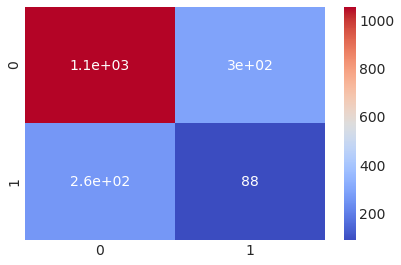

In [ ]:
sns.heatmap(confusion_matrix(preds, y_test), annot = True, cmap = 'coolwarm')

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1316
           1       0.25      0.23      0.24       383

    accuracy                           0.67      1699
   macro avg       0.52      0.52      0.52      1699
weighted avg       0.66      0.67      0.67      1699



In [ ]:
cleaned_df.groupby("ISKARTA").mean()

,MAKINE,fazK_dk,FazS_dk,FazD_dk,FazB_dk,FazS_Basinci_Mean,FazS_Basinci_Stdev,FazB_Basinci_Max,FazK_Basinci_Last,FazD_Basinci_Last,K17_K16_Mesafe,K16,K18,K17,K19,K20,K21,K22,K23,K24,K23_K24_Mesafe,K25,K26,K26_K25_Mesafe,K27,K28,K29,K30,K31,K32,K33,K34,K35,K36,K37,K38,K39,K40,K41,K42,...,K45,K46,Surec4_K1,Surec4_K2,Surec4_K3,SUREC_1_2_FARK_SAAT,SUREC_1_4_FARK_SAAT,SUREC_2_4_FARK_SAAT,VARDIYA_SAAT_SUREC_1,VARDIYA_SAAT_SUREC_2,VARDIYA_SAAT_SUREC_4,SUREC1_FARK,Surec1_Onay_TarihiDateMonth,Surec1_Onay_TarihiDateDay,Surec1_Onay_TarihiDateDayofweek,Surec1_Onay_TarihiDateDayofyear,Surec2_TarihiDateMonth,Surec2_TarihiDateDay,Surec2_TarihiDateDayofweek,Surec2_TarihiDateDayofyear,Kalite_Kontrol_TarihiDateMonth,Kalite_Kontrol_TarihiDateDay,Kalite_Kontrol_TarihiDateDayofweek,Kalite_Kontrol_TarihiDateDayofyear,Surec1_Bitis_TarihiDateMonth,Surec1_Bitis_TarihiDateDay,Surec1_Bitis_TarihiDateDayofweek,Surec1_Bitis_TarihiDateDayofyear,Surec1_Baslama_TarihiDateMonth,Surec1_Baslama_TarihiDateDay,Surec1_Baslama_TarihiDateDayofweek,Surec1_Baslama_TarihiDateDayofyear,Surec4_BitisDateMonth,Surec4_BitisDateDay,Surec4_BitisDateDayofweek,Surec4_BitisDateDayofyear,Surec4_BaslangicDateMonth,Surec4_BaslangicDateDay,Surec4_BaslangicDateDayofweek,Surec4_BaslangicDateDayofyear
ISKARTA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.435773,7.956346,14.210630,0.979715,2.347690,13.783508,1.482601,7.180203,4.615267,0.209311,28.769724,109.115609,15.482967,80.088460,50.017583,2524.752262,41.833343,888.329335,426.453477,280.256149,146.245582,107.757698,192.692803,61.658126,12.059961,37.361544,2413.462041,95.450197,99.942271,35.831582,69.558700,317.673094,261.908412,245.609444,0.246445,0.318354,3.56208,11.899543,15.463183,64.289250,...,111.738961,35.679381,24.979244,1704.520619,1704.947252,12.300344,11.895504,7.717355,11.014576,14.726845,11.964015,1626.171272,6.362739,14.824780,2.900395,176.617826,6.392044,14.971455,2.773459,179.05451,6.505162,15.368813,2.767993,181.523838,6.362739,14.815366,2.898421,176.599150,6.362132,14.807926,2.879897,176.573186,6.430307,15.230185,2.987853,180.701488,6.412238,15.194807,3.084118,180.003189
1,0.444094,7.955508,14.212711,0.981769,2.349552,13.787565,1.489302,7.200020,4.661972,0.215475,28.820892,109.102992,15.485176,80.064567,49.999769,2524.769554,41.733963,889.132283,426.232021,280.002940,146.249659,107.428871,192.354121,61.734473,12.071087,37.490199,2413.305302,94.659843,100.455328,35.908346,69.453963,317.677270,261.905092,245.627612,0.246349,0.318230,3.55722,11.891879,15.449937,64.487454,...,111.545092,35.651864,24.887664,1704.268136,1704.669396,12.000744,11.706291,7.450245,11.461942,14.614173,12.324934,1627.193176,6.375853,14.998425,3.036220,177.199475,6.404724,15.119160,2.825197,179.80105,6.520735,15.593176,2.751181,182.230971,6.375853,14.985302,3.045144,177.178478,6.373753,15.025722,3.027822,177.153806,6.445669,15.280840,3.020472,181.463517,6.424672,15.361680,3.093438,180.778478


<Figure size 3000x2000 with 0 Axes>

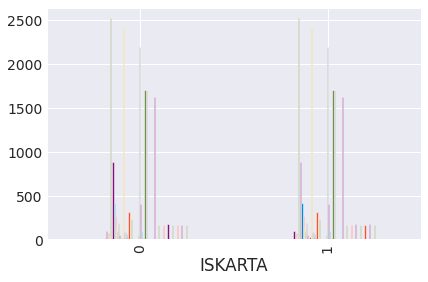

In [ ]:
plt.figure(dpi = 500)
cleaned_df.groupby("ISKARTA").mean().plot(kind='bar', legend = False)

In [ ]:
for col in cleaned_df.groupby("ISKARTA").sum().columns:
    print(col, ": \t\t\t\t",  cleaned_df.groupby("ISKARTA").sum()[col][0] / cleaned_df.groupby("ISKARTA").sum()[col][1])

MAKINE : 				 3.392434988179669
fazK_dk : 				 3.457582097607418
FazS_dk : 				 3.456711700065912
FazD_dk : 				 3.4499863936126087
FazB_dk : 				 3.4544778621147714
FazS_Basinci_Mean : 				 3.4562006539492094
FazS_Basinci_Stdev : 				 3.4416624730817555
FazB_Basinci_Max : 				 3.4477024487682515
FazK_Basinci_Last : 				 3.4225824880617113
FazD_Basinci_Last : 				 3.3583206969162984
K17_K16_Mesafe : 				 3.451079888823516
K16 : 				 3.4576176426998804
K18 : 				 3.4567246771610005
K17 : 				 3.4582495754740132
K19 : 				 3.4584495718408483
K20 : 				 3.457194170263845
K21 : 				 3.465450447277502
K22 : 				 3.454095738745552
K23 : 				 3.459014103934763
K24 : 				 3.4603442483542937
K23_K24_Mesafe : 				 3.4571214648951267
K25 : 				 3.4677999726366817
K26 : 				 3.4633050481586167
K26_K25_Mesafe : 				 3.4529422646673917
K27 : 				 3.45403128101139
K28 : 				 3.445353725340981
K29 : 				 3.4574423864407993
K30 : 				 3.4860836147665073
K31 : 				 3.4395607611328542
K32 : 				 3.449827

In [ ]:
for col in cleaned_df.groupby("ISKARTA").sum().columns:
    if (cleaned_df.groupby("ISKARTA").sum()[col][0] / cleaned_df.groupby("ISKARTA").sum()[col][1]) >= 3.6 or (cleaned_df.groupby("ISKARTA").sum()[col][0] / cleaned_df.groupby("ISKARTA").sum()[col][1]) <= 3.4:
        print(col)

MAKINE
FazD_Basinci_Last
VARDIYA_SAAT_SUREC_1
VARDIYA_SAAT_SUREC_4
Surec1_Onay_TarihiDateDayofweek
Surec2_TarihiDateDayofweek
Surec1_Bitis_TarihiDateDayofweek
Surec1_Baslama_TarihiDateDayofweek


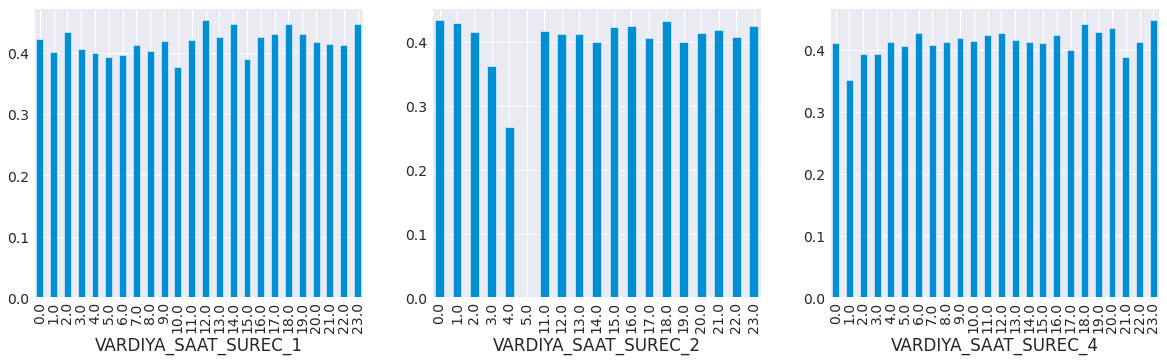

In [ ]:
plt.figure(figsize = (18, 5))
plt.subplot(1, 3, 1)
cleaned_df.groupby("VARDIYA_SAAT_SUREC_1").std()["ISKARTA"].plot(kind="bar")

plt.subplot(1, 3, 2)
cleaned_df.groupby("VARDIYA_SAAT_SUREC_2").std()["ISKARTA"].plot(kind="bar")

plt.subplot(1, 3, 3)
cleaned_df.groupby("VARDIYA_SAAT_SUREC_4").std()["ISKARTA"].plot(kind="bar")

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8491 entries, 0 to 8490
Data columns (total 90 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   MAKINE                              8491 non-null   int64   
 1   fazK_dk                             8491 non-null   float64 
 2   FazS_dk                             8491 non-null   float64 
 3   FazD_dk                             8491 non-null   float64 
 4   FazB_dk                             8491 non-null   float64 
 5   FazS_Basinci_Mean                   8491 non-null   float64 
 6   FazS_Basinci_Stdev                  8491 non-null   float64 
 7   FazB_Basinci_Max                    8491 non-null   float64 
 8   FazK_Basinci_Last                   8491 non-null   float64 
 9   FazD_Basinci_Last                   8491 non-null   float64 
 10  K17_K16_Mesafe                      8491 non-null   float64 
 11  K16                           

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


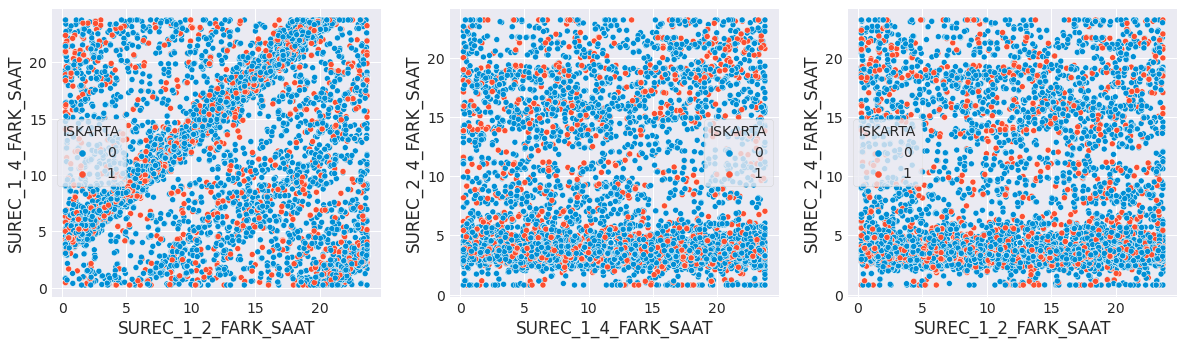

In [ ]:
plt.figure(figsize = (18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(cleaned_df.SUREC_1_2_FARK_SAAT, cleaned_df.SUREC_1_4_FARK_SAAT, hue=cleaned_df.ISKARTA)

plt.subplot(1, 3, 2)
sns.scatterplot(cleaned_df.SUREC_1_4_FARK_SAAT, cleaned_df.SUREC_2_4_FARK_SAAT, hue=cleaned_df.ISKARTA)

plt.subplot(1, 3, 3)
sns.scatterplot(cleaned_df.SUREC_1_2_FARK_SAAT, cleaned_df.SUREC_2_4_FARK_SAAT, hue=cleaned_df.ISKARTA)

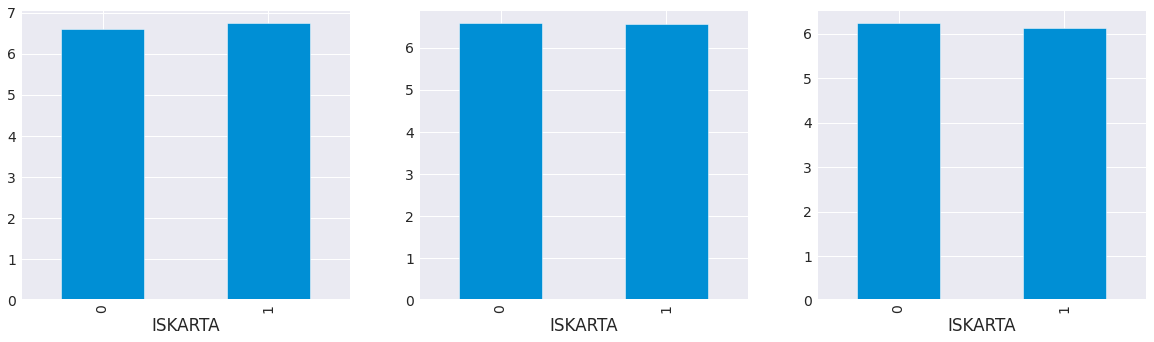

In [ ]:
plt.figure(figsize = (18, 5))
plt.subplot(1, 3, 1)
cleaned_df.groupby("ISKARTA")["SUREC_1_2_FARK_SAAT"].std().plot(kind="bar")

plt.subplot(1, 3, 2)
cleaned_df.groupby("ISKARTA")["SUREC_1_4_FARK_SAAT"].std().plot(kind="bar")

plt.subplot(1, 3, 3)
cleaned_df.groupby("ISKARTA")["SUREC_2_4_FARK_SAAT"].std().plot(kind="bar")

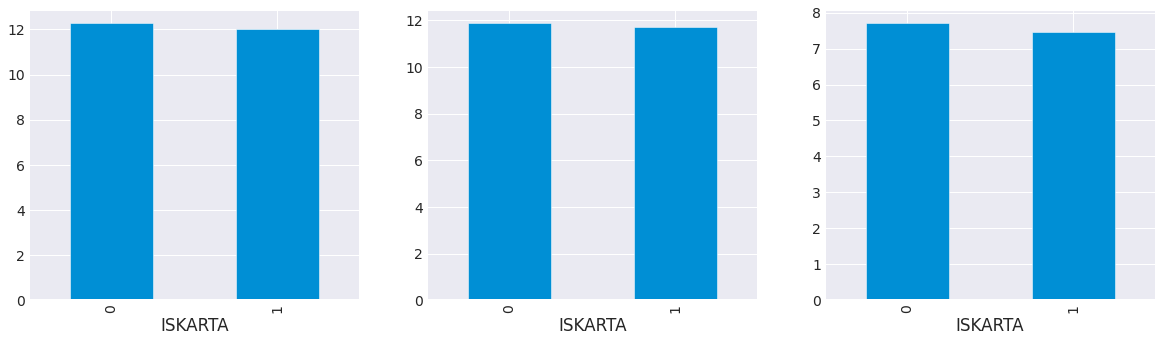

In [ ]:
plt.figure(figsize = (18, 5))
plt.subplot(1, 3, 1)
cleaned_df.groupby("ISKARTA")["SUREC_1_2_FARK_SAAT"].mean().plot(kind="bar")

plt.subplot(1, 3, 2)
cleaned_df.groupby("ISKARTA")["SUREC_1_4_FARK_SAAT"].mean().plot(kind="bar")

plt.subplot(1, 3, 3)
cleaned_df.groupby("ISKARTA")["SUREC_2_4_FARK_SAAT"].mean().plot(kind="bar")

In [ ]:
print(cleaned_df.groupby("ISKARTA")["SUREC_1_4_FARK_SAAT"].mean())
print(cleaned_df.groupby("ISKARTA")["SUREC_1_4_FARK_SAAT"].std())
print(cleaned_df.groupby("ISKARTA")["SUREC_2_4_FARK_SAAT"].mean())
print(cleaned_df.groupby("ISKARTA")["SUREC_2_4_FARK_SAAT"].std())
print(cleaned_df.groupby("ISKARTA")["SUREC_1_2_FARK_SAAT"].mean())
print(cleaned_df.groupby("ISKARTA")["SUREC_1_2_FARK_SAAT"].std())

ISKARTA
0    11.895504
1    11.706291
Name: SUREC_1_4_FARK_SAAT, dtype: float64
ISKARTA
0    6.593003
1    6.555404
Name: SUREC_1_4_FARK_SAAT, dtype: float64
ISKARTA
0    7.717355
1    7.450245
Name: SUREC_2_4_FARK_SAAT, dtype: float64
ISKARTA
0    6.249152
1    6.121667
Name: SUREC_2_4_FARK_SAAT, dtype: float64
ISKARTA
0    12.300344
1    12.000744
Name: SUREC_1_2_FARK_SAAT, dtype: float64
ISKARTA
0    6.601453
1    6.754196
Name: SUREC_1_2_FARK_SAAT, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

0.7745732783990583


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


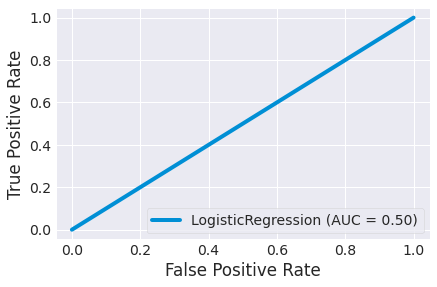

In [ ]:
model.fit(X_train2, y_train)
y_preds = model.predict(X_test2)

plot_roc_curve(model, X_test2, y_test)
print(accuracy_score(y_preds, y_test))

In [ ]:
confusion_matrix(y_preds, y_test)

array([[1316,  383],
       [   0,    0]])

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1316
           1       0.00      0.00      0.00       383

    accuracy                           0.77      1699
   macro avg       0.39      0.50      0.44      1699
weighted avg       0.60      0.77      0.68      1699



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from scipy.stats import stats
stats.ttest_ind(cleaned_df['Surec1_Bitis_TarihiDateDayofweek'][cleaned_df['ISKARTA'] == 1],
                cleaned_df['Surec1_Bitis_TarihiDateDayofweek'][cleaned_df['ISKARTA'] == 0])

Ttest_indResult(statistic=2.8174598633108188, pvalue=0.004851701418791594)

In [ ]:
stats.ttest_ind(cleaned_df['MAKINE'][cleaned_df['ISKARTA'] == 1],
                cleaned_df['MAKINE'][cleaned_df['ISKARTA'] == 0])

Ttest_indResult(statistic=0.644735321159496, pvalue=0.5191161446343018)

In [ ]:
stats.ttest_ind(cleaned_df['FazD_Basinci_Last'][cleaned_df['ISKARTA'] == 1],
                cleaned_df['FazD_Basinci_Last'][cleaned_df['ISKARTA'] == 0])

Ttest_indResult(statistic=0.9538080614623575, pvalue=0.3402079661189058)

In [ ]:
significant_cols = []
for col in cleaned_df.drop('ISKARTA', axis = 1).columns:
    try:
        t = stats.ttest_ind(cleaned_df[col][cleaned_df['ISKARTA'] == 1],
                    cleaned_df[col][cleaned_df['ISKARTA'] == 0])
        if t.pvalue <= 0.05:
            print(col, "\n \t P Value: ", t.pvalue)
            significant_cols.append(col)
    except:
        continue

FazB_Basinci_Max 
 	 P Value:  0.0036122124395477264
K28 
 	 P Value:  0.01062997321266264
K31 
 	 P Value:  0.041830530155149516
K41 
 	 P Value:  0.019058064568217698
K42 
 	 P Value:  0.011151156521280682
K43 
 	 P Value:  0.03324859522982279
Surec4_K2 
 	 P Value:  0.015345842190342098
Surec4_K3 
 	 P Value:  0.006524940094138972
Vardiya_1 
 	 P Value:  0.0016772312114242697
VARDIYA_SAAT_SUREC_1 
 	 P Value:  0.010850830638087245
VARDIYA_SAAT_SUREC_4 
 	 P Value:  0.01678836675243044
Surec1_Onay_TarihiDateDayofweek 
 	 P Value:  0.009140506082947105
Surec1_Bitis_TarihiDateDayofweek 
 	 P Value:  0.004851701418791594
Surec1_Baslama_TarihiDateDayofweek 
 	 P Value:  0.004538476790400558


In [ ]:
cleaned_df.VARDIYA_SAAT_SUREC_4.value_counts()

12.0    1419
8.0      646
17.0     597
9.0      557
16.0     505
11.0     382
4.0      340
15.0     336
10.0     333
13.0     315
20.0     309
19.0     290
18.0     277
23.0     265
14.0     264
0.0      252
3.0      242
22.0     217
5.0      179
21.0     174
7.0      168
1.0      167
2.0      148
6.0      109
Name: VARDIYA_SAAT_SUREC_4, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


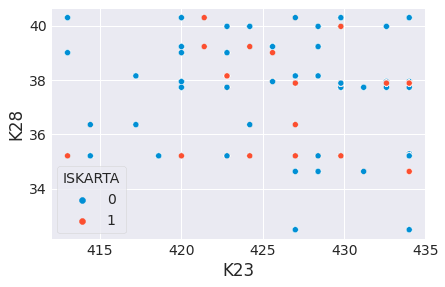

In [ ]:
sns.scatterplot("K23", "K28", hue="ISKARTA", data=cleaned_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


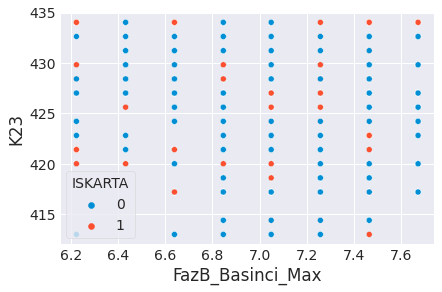

In [ ]:
sns.scatterplot("FazB_Basinci_Max", "K23", hue="ISKARTA", data=cleaned_df)

In [ ]:
target = cleaned_df["ISKARTA"]
features = cleaned_df[significant_cols]

0.7057092407298411


array([[1133,  330],
       [ 170,   66]])

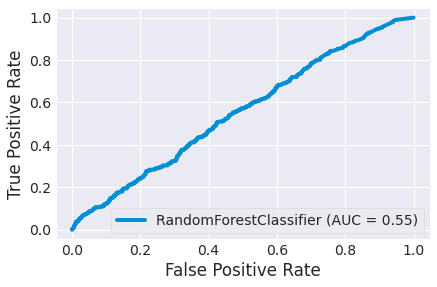

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, shuffle=True)

model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_pred, y_test))
plot_roc_curve(model, X_test, y_test)
confusion_matrix(y_pred, y_test)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1303
           1       0.28      0.17      0.21       396

    accuracy                           0.71      1699
   macro avg       0.53      0.52      0.51      1699
weighted avg       0.66      0.71      0.68      1699



<BarContainer object of 14 artists>

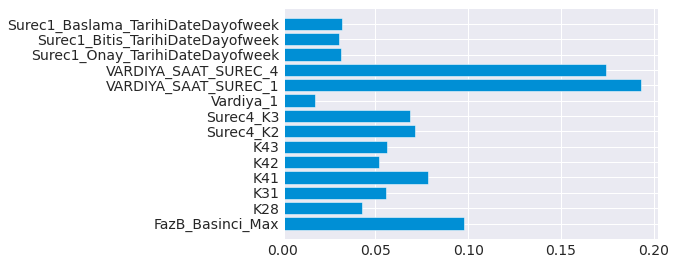

In [ ]:
print(classification_report(y_test,y_pred))
plt.barh(X_train.columns, model.feature_importances_)

0.6656856974690994
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1303
           1       0.24      0.20      0.22       396

    accuracy                           0.67      1699
   macro avg       0.50      0.50      0.50      1699
weighted avg       0.65      0.67      0.65      1699



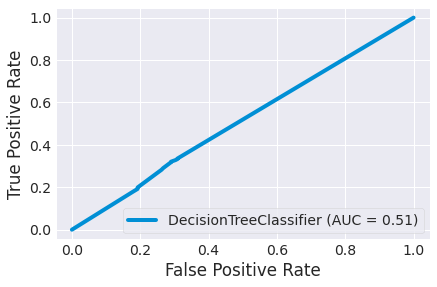

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_pred, y_test))
plot_roc_curve(model, X_test, y_test)
confusion_matrix(y_pred, y_test)
print(classification_report(y_test,y_pred))

0.7669217186580342


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1303
           1       0.00      0.00      0.00       396

    accuracy                           0.77      1699
   macro avg       0.38      0.50      0.43      1699
weighted avg       0.59      0.77      0.67      1699



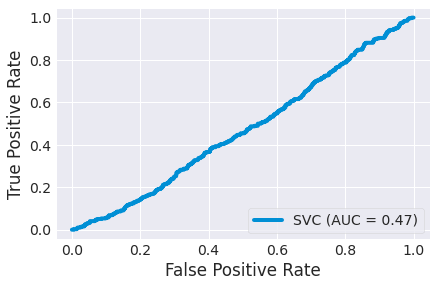

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures

model = SVC()

pol = PolynomialFeatures(degree=2)

X_train_Pol = pol.fit_transform(X_train)
X_test_Pol = pol.fit_transform(X_test) 

model.fit(X_train_Pol, y_train)
y_pred = model.predict(X_test_Pol)

print(accuracy_score(y_pred, y_test))
plot_roc_curve(model, X_test_Pol, y_test)
confusion_matrix(y_pred, y_test)
print(classification_report(y_test,y_pred))

0.7669217186580342
[[1303  396]
 [   0    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1303
           1       0.00      0.00      0.00       396

    accuracy                           0.77      1699
   macro avg       0.38      0.50      0.43      1699
weighted avg       0.59      0.77      0.67      1699



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


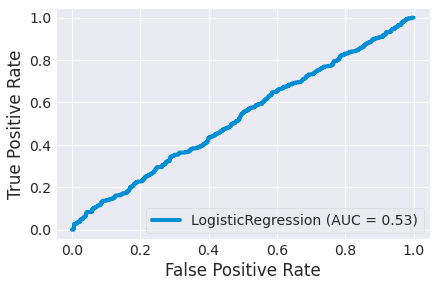

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

plot_roc_curve(model, X_test, y_test)
print(accuracy_score(y_preds, y_test))
print(confusion_matrix(y_preds, y_test))
print(classification_report(y_test,y_pred))

In [ ]:
model = Sequential([
                    Dense(90, activation="relu"),
                    Dense(90, activation="relu"),
                    Dense(45, activation="relu"),
                    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics="mse")
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train)
X_test3 = scaler.transform(X_test)

# X_train_Pol = pol.fit_transform(X_train2)
# X_test_Pol = pol.fit_transform(X_test2) 

history = model.fit(X_train3, y_train, epochs=100, verbose=0, validation_data=(X_test3, y_test))
y_pred = model.predict(X_test3) >= 0.44
preds  = np.array(y_pred, dtype=np.int)

print(accuracy_score(preds, y_test))
print(confusion_matrix(preds, y_test))
print(classification_report(y_test,preds))

0.6668628605061802
[[1030  293]
 [ 273  103]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1303
           1       0.27      0.26      0.27       396

    accuracy                           0.67      1699
   macro avg       0.53      0.53      0.53      1699
weighted avg       0.66      0.67      0.66      1699



In [ ]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

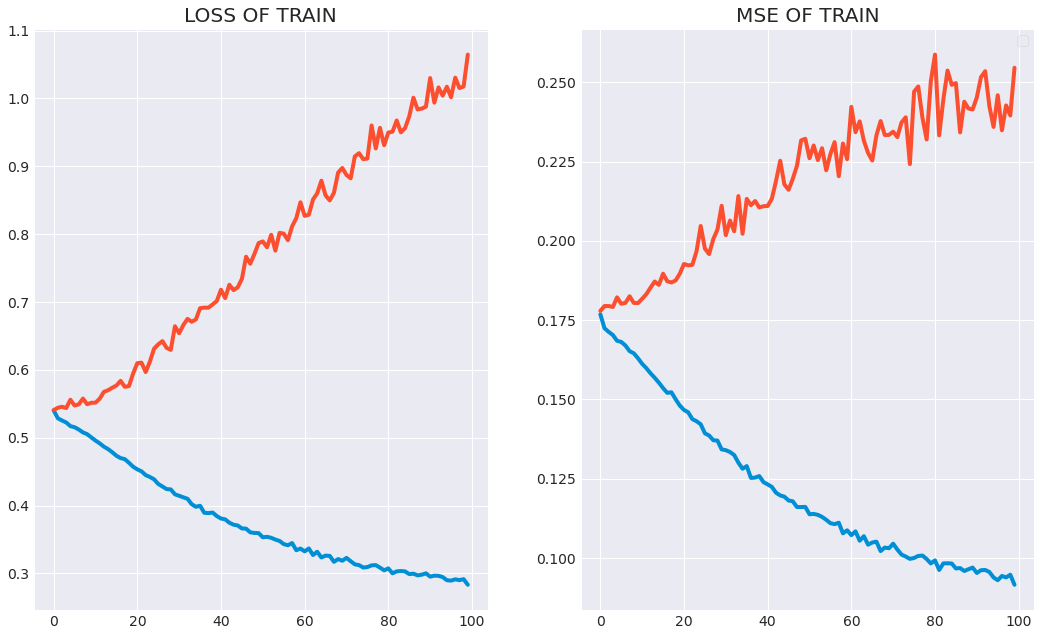

In [ ]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.lineplot(list(range(len(history.history["loss"]))), history.history["loss"])
sns.lineplot(list(range(len(history.history["val_loss"]))), history.history["val_loss"])
plt.title("LOSS OF TRAIN")
plt.subplot(1,2,2)
sns.lineplot(list(range(len(history.history["mse"]))), history.history["mse"])
sns.lineplot(list(range(len(history.history["val_mse"]))), history.history["val_mse"])
plt.title("MSE OF TRAIN")
plt.legend()

In [ ]:
print(significant_cols)
print(len(significant_cols))

['FazB_Basinci_Max', 'K28', 'K31', 'K41', 'K42', 'K43', 'Surec4_K2', 'Surec4_K3', 'Vardiya_1', 'VARDIYA_SAAT_SUREC_1', 'VARDIYA_SAAT_SUREC_4', 'Surec1_Onay_TarihiDateDayofweek', 'Surec1_Bitis_TarihiDateDayofweek', 'Surec1_Baslama_TarihiDateDayofweek']
14


In [ ]:
significant_cols.append('ISKARTA')
significant_cols = set(significant_cols)
cleaned_df[significant_cols].head()


,Surec4_K3,VARDIYA_SAAT_SUREC_1,Surec1_Baslama_TarihiDateDayofweek,Vardiya_1,FazB_Basinci_Max,Surec1_Onay_TarihiDateDayofweek,K43,Surec1_Bitis_TarihiDateDayofweek,K28,ISKARTA,VARDIYA_SAAT_SUREC_4,K31,Surec4_K2,K41,K42
0,1712.2,3.0,5.0,1,7.2576,5.0,2202.2,5.0,32.494,0,13.0,99.4,1709.4,15.498,60.2
1,1712.2,3.0,5.0,1,7.2576,5.0,2202.2,5.0,32.494,0,13.0,99.4,1709.4,15.498,60.2
2,1712.2,3.0,5.0,1,7.2576,5.0,2202.2,5.0,32.494,1,0.0,99.4,1709.4,15.498,60.2
3,1712.2,3.0,5.0,1,7.2576,5.0,2202.2,5.0,32.494,1,0.0,99.4,1709.4,15.498,60.2
4,1709.4,3.0,5.0,1,7.2576,5.0,2210.6,5.0,32.494,0,11.0,78.4,1710.8,15.526,63.0


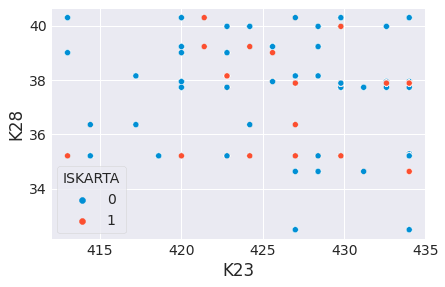

In [ ]:
sns.scatterplot(x = 'K23', y = 'K28', data = cleaned_df, hue = 'ISKARTA')

In [ ]:
cleaned_df[significant_cols].corr()

,Surec4_K3,VARDIYA_SAAT_SUREC_1,Surec1_Baslama_TarihiDateDayofweek,FazB_Basinci_Max,Surec1_Onay_TarihiDateDayofweek,K43,Surec1_Bitis_TarihiDateDayofweek,K28,ISKARTA,VARDIYA_SAAT_SUREC_4,K31,Surec4_K2,K41,K42
Surec4_K3,1.000000,-0.021380,0.005342,-0.145876,0.003100,0.194886,0.003665,-0.227941,-0.029518,0.033146,0.032676,0.879960,0.156985,-0.170833
VARDIYA_SAAT_SUREC_1,-0.021380,1.000000,0.042766,0.047946,0.027309,0.046142,0.027783,0.035845,0.027645,0.026152,0.009295,-0.036265,0.015889,0.010944
Surec1_Baslama_TarihiDateDayofweek,0.005342,0.042766,1.000000,0.057440,0.984267,0.040852,0.992219,0.002250,0.030797,-0.034301,-0.049011,0.026451,-0.005702,-0.069647
FazB_Basinci_Max,-0.145876,0.047946,0.057440,1.000000,0.063439,0.027328,0.061046,0.071361,0.031579,0.019582,0.003760,-0.139638,-0.054383,-0.034353
Surec1_Onay_TarihiDateDayofweek,0.003100,0.027309,0.984267,0.063439,1.000000,0.042518,0.992043,0.002755,0.028288,-0.034655,-0.045799,0.024762,-0.006468,-0.068460
K43,0.194886,0.046142,0.040852,0.027328,0.042518,1.000000,0.040298,0.045611,-0.023106,0.018829,0.053854,0.194797,0.010939,-0.087881
Surec1_Bitis_TarihiDateDayofweek,0.003665,0.027783,0.992219,0.061046,0.992043,0.040298,1.000000,0.002347,0.030565,-0.034514,-0.045640,0.024709,-0.006049,-0.068253
K28,-0.227941,0.035845,0.002250,0.071361,0.002755,0.045611,0.002347,1.000000,0.027722,-0.010888,0.220484,-0.222978,0.091456,0.155842
ISKARTA,-0.029518,0.027645,0.030797,0.031579,0.028288,-0.023106,0.030565,0.027722,1.000000,0.025951,0.022087,-0.026306,-0.025442,0.027541
VARDIYA_SAAT_SUREC_4,0.033146,0.026152,-0.034301,0.019582,-0.034655,0.018829,-0.034514,-0.010888,0.025951,1.000000,0.046821,0.020888,-0.025878,0.012241


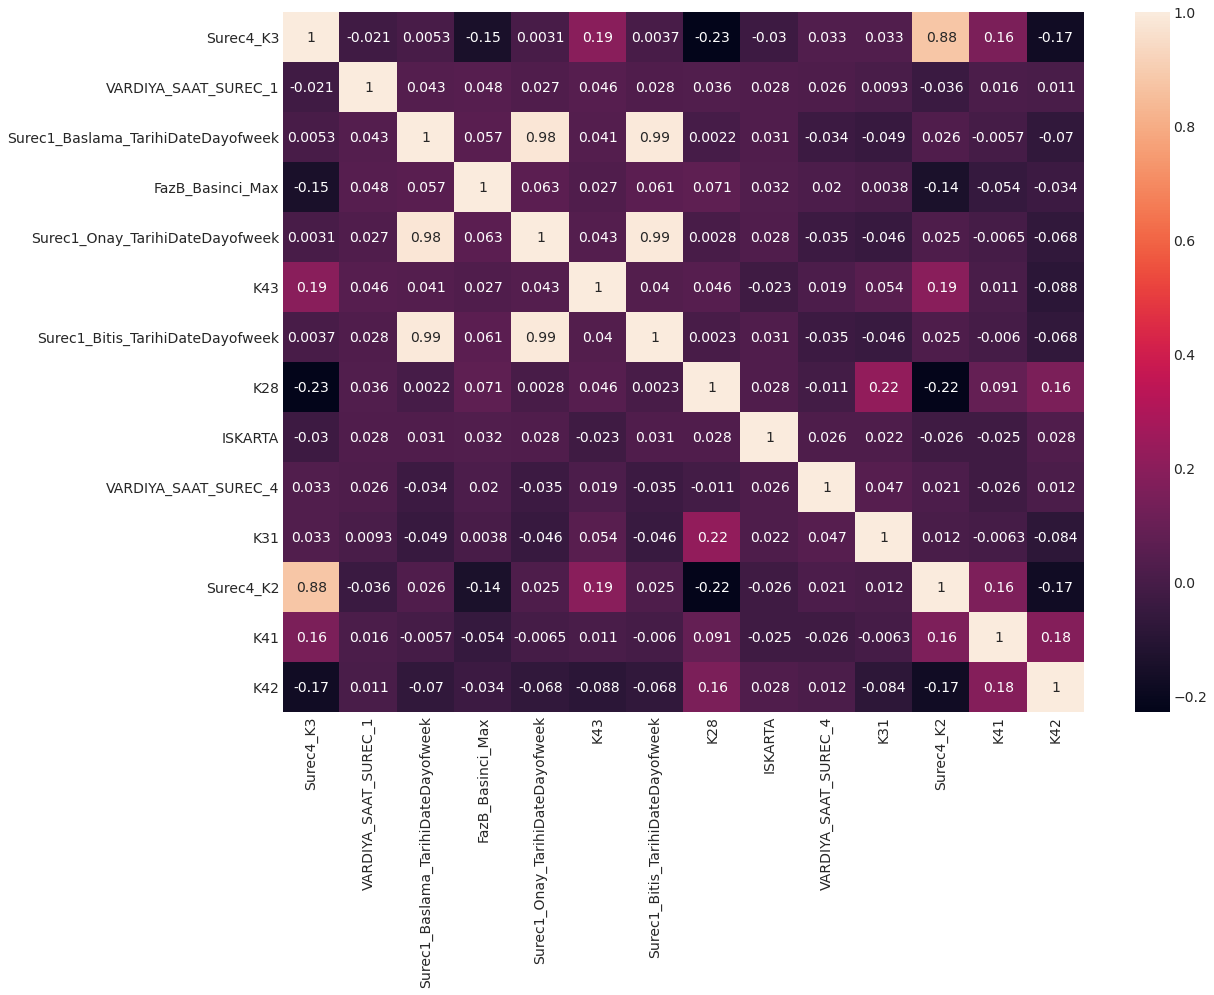

In [ ]:
plt.figure(figsize = (16, 12))
sns.heatmap(cleaned_df[significant_cols].corr(), annot = True)

In [ ]:
significant_cols2 = []
for col in cleaned_df.drop('ISKARTA', axis = 1).columns:
    try:
        t = stats.ttest_ind(cleaned_df[col],
                    cleaned_df['ISKARTA'])
        if t.pvalue <= 0.05:
            print(col, "\n \t P Value: ", t.pvalue)
            significant_cols2.append(col)
    except:
        continue

MAKINE 
 	 P Value:  1.0733699262558646e-196
fazK_dk 
 	 P Value:  0.0
FazS_dk 
 	 P Value:  0.0
FazD_dk 
 	 P Value:  0.0
FazB_dk 
 	 P Value:  0.0
FazS_Basinci_Mean 
 	 P Value:  0.0
FazS_Basinci_Stdev 
 	 P Value:  0.0
FazB_Basinci_Max 
 	 P Value:  0.0
FazK_Basinci_Last 
 	 P Value:  0.0
FazD_Basinci_Last 
 	 P Value:  0.009533307744796363
K17_K16_Mesafe 
 	 P Value:  0.0
K16 
 	 P Value:  0.0
K18 
 	 P Value:  0.0
K17 
 	 P Value:  0.0
K19 
 	 P Value:  0.0
K20 
 	 P Value:  0.0
K21 
 	 P Value:  0.0
K22 
 	 P Value:  0.0
K23 
 	 P Value:  0.0
K24 
 	 P Value:  0.0
K23_K24_Mesafe 
 	 P Value:  0.0
K25 
 	 P Value:  0.0
K26 
 	 P Value:  0.0
K26_K25_Mesafe 
 	 P Value:  0.0
K27 
 	 P Value:  0.0
K28 
 	 P Value:  0.0
K29 
 	 P Value:  0.0
K30 
 	 P Value:  0.0
K31 
 	 P Value:  0.0
K32 
 	 P Value:  0.0
K33 
 	 P Value:  0.0
K34 
 	 P Value:  0.0
K35 
 	 P Value:  0.0
K36 
 	 P Value:  0.0
K37 
 	 P Value:  1.1060998635933096e-06
K38 
 	 P Value:  1.7623119359147206e-94
K39 
 	 P V